<a href="https://colab.research.google.com/github/Nitya-Varanasi/jupyterNotes/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis**

1. Exploration - Pandas and Matplotlib
2. Forecasting - Prophet

In forecasting, features must be in date time format

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
raw_df = pd.read_html('https://raw.githubusercontent.com/diazoniclabs/Microland/main/onion_2019.html')
raw_df

[                                      0
 0  DATE WISE MARKET ARRIVALS AND PRICES,
           0                                                  1        2  \
 0    Crop :              Select  Garlic  Onion  Potato  Tomato   Year :   
 1  Market :  All  ABOHAR(PB)  AGRA(UP)  AHMEDABAD(GUJ)  AHM...  Month :   
 2       NaN                                                NaN      NaN   
 
                                                    3  
 0  All  2022  2021  2020  2019  2018  2017  2016 ...  
 1  All  January  February  March  April  May  Jun...  
 2                                                NaN  ,
                                                 0
 0  DATE WISE MARKET ARRIVALS AND PRICES FOR ONION,
             Date     Market  Arrival(q) Price Minimum (Rs/q)  \
 0    01/Jan/2019  BANGALORE       17819                  600   
 1    02/Jan/2019  BANGALORE       16948                  600   
 2    03/Jan/2019  BANGALORE       21184                  600   
 3    04/Jan/2019  BANG

In [21]:
len(raw_df)

4

In [23]:
df = raw_df[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2019,BANGALORE,17819,600,1400,900
1,02/Jan/2019,BANGALORE,16948,600,1400,900
2,03/Jan/2019,BANGALORE,21184,600,1400,900
3,04/Jan/2019,BANGALORE,21184,600,1400,900
4,05/Jan/2019,BANGALORE,22709,600,1400,900
...,...,...,...,...,...,...
936,27/Dec/2019,KOLKATA,1920,8500,9000,8750
937,28/Dec/2019,KOLKATA,1760,8500,9250,8875
938,30/Dec/2019,KOLKATA,2560,7500,8750,8125
939,31/Dec/2019,KOLKATA,2720,6750,7500,7125


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  940 non-null    object
 1   Market                941 non-null    object
 2   Arrival(q)            941 non-null    int64 
 3   Price Minimum (Rs/q)  941 non-null    object
 4   Price Maximum (Rs/q)  941 non-null    object
 5   Modal Price (Rs/q)    941 non-null    object
dtypes: int64(1), object(5)
memory usage: 44.2+ KB


In [29]:
df = df.dropna()#3
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2019,BANGALORE,17819,600,1400,900
1,02/Jan/2019,BANGALORE,16948,600,1400,900
2,03/Jan/2019,BANGALORE,21184,600,1400,900
3,04/Jan/2019,BANGALORE,21184,600,1400,900
4,05/Jan/2019,BANGALORE,22709,600,1400,900
...,...,...,...,...,...,...
935,26/Dec/2019,KOLKATA,1920,8500,9000,8750
936,27/Dec/2019,KOLKATA,1920,8500,9000,8750
937,28/Dec/2019,KOLKATA,1760,8500,9250,8875
938,30/Dec/2019,KOLKATA,2560,7500,8750,8125


In [31]:
df['Date'] = pd.to_datetime(df['Date'])#4

In [32]:
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,2019-01-01,BANGALORE,17819,600,1400,900
1,2019-01-02,BANGALORE,16948,600,1400,900
2,2019-01-03,BANGALORE,21184,600,1400,900
3,2019-01-04,BANGALORE,21184,600,1400,900
4,2019-01-05,BANGALORE,22709,600,1400,900
...,...,...,...,...,...,...
935,2019-12-26,KOLKATA,1920,8500,9000,8750
936,2019-12-27,KOLKATA,1920,8500,9000,8750
937,2019-12-28,KOLKATA,1760,8500,9250,8875
938,2019-12-30,KOLKATA,2560,7500,8750,8125


Explore the Average value price of Onion in different cities wrt Date
1. Rename the column of Average Price
2. Consider the column Date, market and Average Price and drop other columns
3. Check the missing/unwanted values and drop them
4. Convert the columns into required datatype
5. Plot the Line chart for avg value price of different cities
6. Which are the different cities  
7. Which city and date pricing is highest/lowest  
8. Group the avg price based on city  
9. Highest/Lowest Price of onion in every city

In [34]:
df = df.rename(columns = {'Modal Price (Rs/q)':'Average'})#1
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Average
0,2019-01-01,BANGALORE,17819,600,1400,900
1,2019-01-02,BANGALORE,16948,600,1400,900
2,2019-01-03,BANGALORE,21184,600,1400,900
3,2019-01-04,BANGALORE,21184,600,1400,900
4,2019-01-05,BANGALORE,22709,600,1400,900
...,...,...,...,...,...,...
935,2019-12-26,KOLKATA,1920,8500,9000,8750
936,2019-12-27,KOLKATA,1920,8500,9000,8750
937,2019-12-28,KOLKATA,1760,8500,9250,8875
938,2019-12-30,KOLKATA,2560,7500,8750,8125


In [35]:
df = df[['Date','Market','Average']] #2
df

,Date,Market,Average
0,2019-01-01,BANGALORE,900
1,2019-01-02,BANGALORE,900
2,2019-01-03,BANGALORE,900
3,2019-01-04,BANGALORE,900
4,2019-01-05,BANGALORE,900
...,...,...,...
935,2019-12-26,KOLKATA,8750
936,2019-12-27,KOLKATA,8750
937,2019-12-28,KOLKATA,8875
938,2019-12-30,KOLKATA,8125


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     940 non-null    datetime64[ns]
 1   Market   940 non-null    object        
 2   Average  940 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 29.4+ KB


In [37]:
df['Average'] = df['Average'].astype(int)#4
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     940 non-null    datetime64[ns]
 1   Market   940 non-null    object        
 2   Average  940 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 29.4+ KB


<ipython-input-37-39d32e698a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average'] = df['Average'].astype(int)


In [41]:
df['Market'].unique()#6
df['Market'].value_counts()

DELHI        252
BANGALORE    246
CHENNAI      240
KOLKATA      202
Name: Market, dtype: int64

In [46]:
maxAvg = df['Average'].max()#7
df[df['Average'] == maxAvg]

,Date,Market,Average
229,2019-12-06,BANGALORE,14000
468,2019-12-07,CHENNAI,14000


In [47]:
minAvg = df['Average'].min()#7
df[df['Average'] == minAvg]

,Date,Market,Average
30,2019-02-11,BANGALORE,550


In [48]:
df.groupby('Market').mean()#8

<ipython-input-48-6e4764f8f728>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Market').mean()


,Average
Market,
BANGALORE,2350.463415
CHENNAI,3062.083333
DELHI,1831.503968
KOLKATA,2943.673267


In [49]:
df.groupby('Market').min()#9

,Date,Average
Market,,
BANGALORE,2019-01-01,550
CHENNAI,2019-01-02,850
DELHI,2019-01-01,585
KOLKATA,2019-01-02,725


In [51]:
df.groupby('Market').max()#9

,Date,Average
Market,,
BANGALORE,2019-12-31,14000
CHENNAI,2019-12-31,14000
DELHI,2019-12-31,7650
KOLKATA,2019-12-31,11500


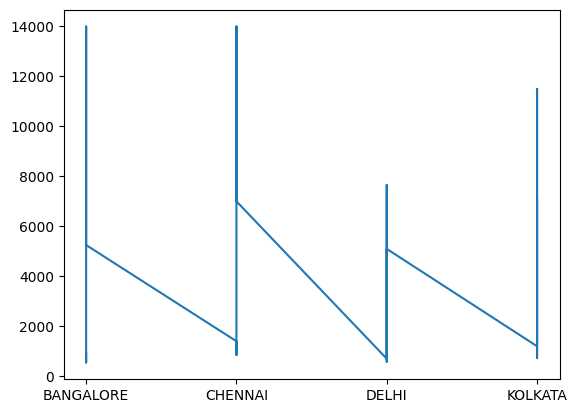

In [56]:
plt.plot(df['Market'], df['Average'])

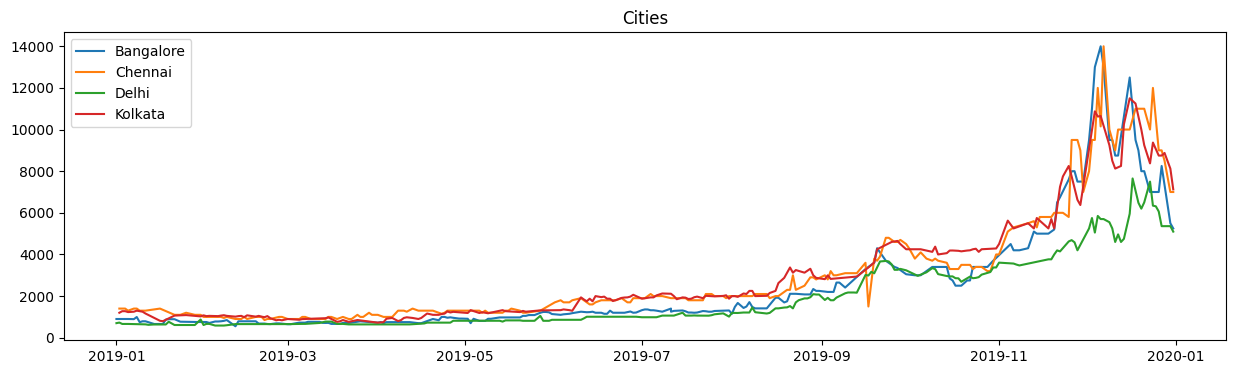

In [62]:
cy = df['Market'].unique()
bl = df[df['Market'] == cy[0]]
ch = df[df['Market'] == cy[1]]
dh = df[df['Market'] == cy[2]]
kl = df[df['Market'] == cy[3]]

plt.figure(figsize = (15,4))
plt.plot(bl['Date'],bl['Average'], label = 'Bangalore')
plt.plot(ch['Date'],ch['Average'], label = 'Chennai')
plt.plot(dh['Date'],dh['Average'], label = 'Delhi')
plt.plot(kl['Date'],kl['Average'], label = 'Kolkata')
plt.legend()
plt.title('Cities')
plt.show()

# **Forecasting**

In [67]:
from prophet import Prophet

In [66]:
bl = bl.rename(columns = {'Date':'ds', 'Average':'y'})
bl = bl.drop(columns = 'Market')
bl

,ds,y
0,2019-01-01,900
1,2019-01-02,900
2,2019-01-03,900
3,2019-01-04,900
4,2019-01-05,900
...,...,...
241,2019-12-24,7000
242,2019-12-26,7000
243,2019-12-27,8250
244,2019-12-30,5500


In [68]:
m = Prophet()
m.fit(bl)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0fup6bl/8c5qmggn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0fup6bl/8dfwf2ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64233', 'data', 'file=/tmp/tmpg0fup6bl/8c5qmggn.json', 'init=/tmp/tmpg0fup6bl/8dfwf2ex.json', 'output', 'file=/tmp/tmpg0fup6bl/prophet_modelxef84jmq/prophet_model-20230810131802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [77]:
future = m.make_future_dataframe(periods = 10)
future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
248,2020-01-06
249,2020-01-07
250,2020-01-08
251,2020-01-09


yhat = predicted avg value  
yhat_lower = lower limit  
yhat_upper = upper limit

In [78]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,458.622044,-800.232038,1804.744698
1,2019-01-02,584.273584,-782.676581,1796.375026
2,2019-01-03,470.710098,-884.730051,1681.051539
3,2019-01-04,612.402428,-688.962647,1859.509626
4,2019-01-05,705.816913,-533.666990,1986.461150
...,...,...,...,...
248,2020-01-06,9405.549894,8115.716352,10735.932620
249,2020-01-07,9441.354908,8193.656291,10798.417217
250,2020-01-08,9627.072732,8371.481682,10953.987926
251,2020-01-09,9573.575530,8333.700850,10832.444469


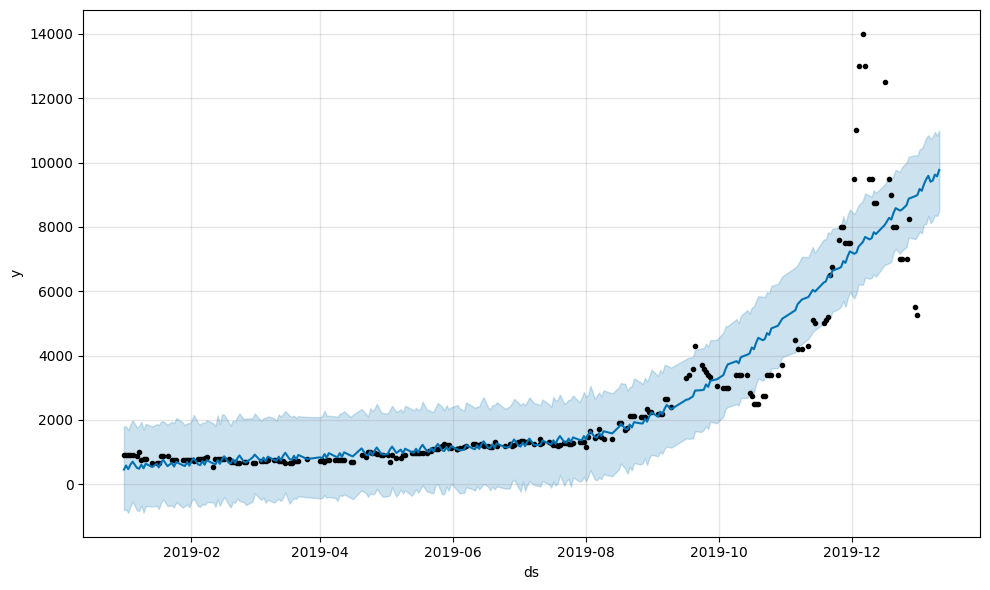

In [79]:
fig1 = m.plot(forecast)

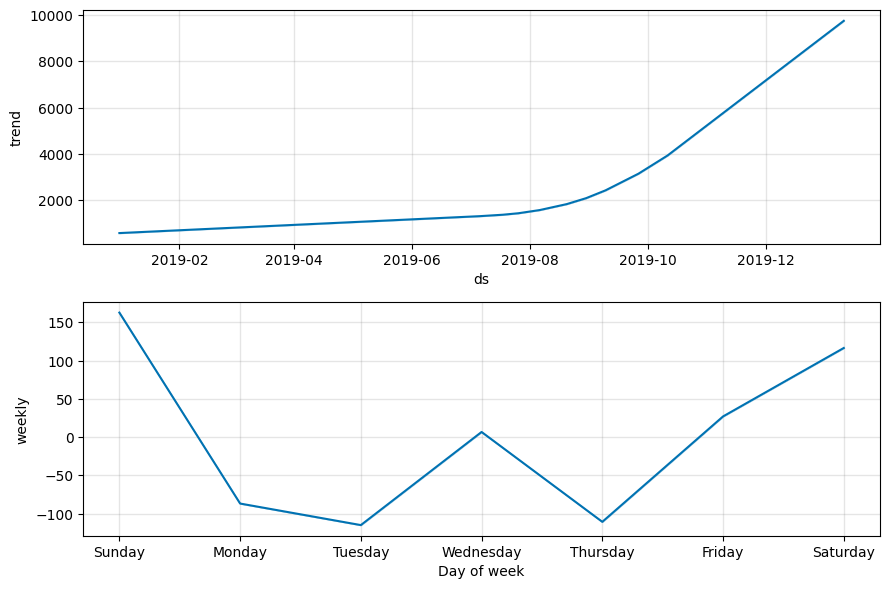

In [80]:
fig2 = m.plot_components(forecast)